# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [1]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

**1)** Метод наименьших квадратов минимизирует отклонение по квадратичной норме:
$$F(\theta) = ||Y - X\theta||^2$$
В одномерном случае:
$$F(\theta) = ||Y - X\theta||^2 -> \min\limits_{\theta \in ℝ}$$
Необходимым условием минимума является равенство нулю градиента, в одномерном случае - производной.
$$\nabla F = 2X^TX\theta - 2X^TY = 0$$ т.е:
$$\hat{\theta} = (X^TX)^{-1}X^TY$$ В нашем случае $$X = \begin{pmatrix} x_1\\ x_2 \\ ... \\ x_n \end{pmatrix}, Y = \begin{pmatrix} y_1\\ y_2 \\ ... \\ y_n \end{pmatrix}$$
$X^TX$ - скалярное произведение, значит $(X^TX)^{-1}$ это: $$(\sum_{i=1}^{n}x_i^2)^{-1}$$
$X^TY$ -  тоже скалярное произведение, значит $X^TY$ это: $$\sum_{i=1}^{n}x_iy_i$$
Итоговая формула в явном виде (в предположении что $x_i$ не равны все нулю): $$\hat{\theta} = \frac{\sum_{i=1}^{n}x_iy_i}{\sum_{i=1}^{n}x_i^2}$$

**2)** Для поиска тета с крышкой будем минимизировать квадратичную норму F. Формула итерации градиентного спуска:
$$\theta_{k+1} = \theta_k - \eta \nabla F(\theta_k) = \theta_k - \eta (2X^TX\theta_k - 2X^TY)$$
Где $\eta$ - это параметр, который в некоторых случаях может зависить от k, называемый шагом.
Занося двойку в $\eta$:
$$\theta_{k+1} = \theta_k - \eta X^T(X\theta_k - Y)$$
Переписывая в явном виде:
$$\theta_{k+1} = \theta_k - \eta {\sum_{i=1}^{n}x_i(x_i\theta_k - y_i)}$$
В стохастическом градиентном спуске сумма считается по случайному набору слогаемых. 
$$\theta_{k+1} = \theta_k - \frac{\eta n}{m} {\sum_{i \in I}x_i(x_i\theta_k - y_i)},$$ где $I$ - батч размера m, выбираемый случайно на каждой итерации, т.е случайное мультимножество чисел постоянного размера m от 1 до n: $$I = \{i_1, i_2... i_m\}$$
$$i_1, i_2... i_n \sim \cup\{1, 2... n\}, \ выбираются \ независимо \ с \ повторениями $$ а $\frac{ n}{m}$ - нормирующий множитель.

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

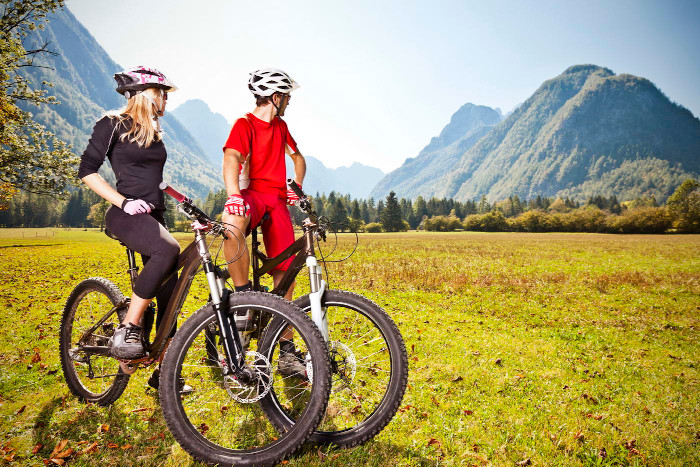

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [4]:
data = pd.read_csv(
    '/home/danilach/mipt-stats/task3/bike+sharing+dataset/day.csv',
    parse_dates=[1])

data = data[[
    'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
    'atemp', 'hum', 'windspeed', 'cnt'
]]

train, test = train_test_split(data, test_size=0.2, random_state=2)
train.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
375,1,1,0,3,1,2,0.274167,0.282821,0.847500,0.131221,2177
32,1,2,0,3,1,2,0.260000,0.254417,0.775417,0.264308,1526
591,3,8,0,2,1,1,0.726667,0.676779,0.686667,0.169158,6784
376,1,1,0,4,1,2,0.382500,0.381938,0.802917,0.180967,4097
676,4,11,0,3,1,2,0.295833,0.274621,0.547500,0.304108,5035


#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

Выделим категории признаков



In [5]:
categorial_features = [
    'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'
]  # категориальные признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

#### Зависимость числа арендованных велосипедов от месяца

Посмотрим на зависимость числа арендованных велосипедов от месяца

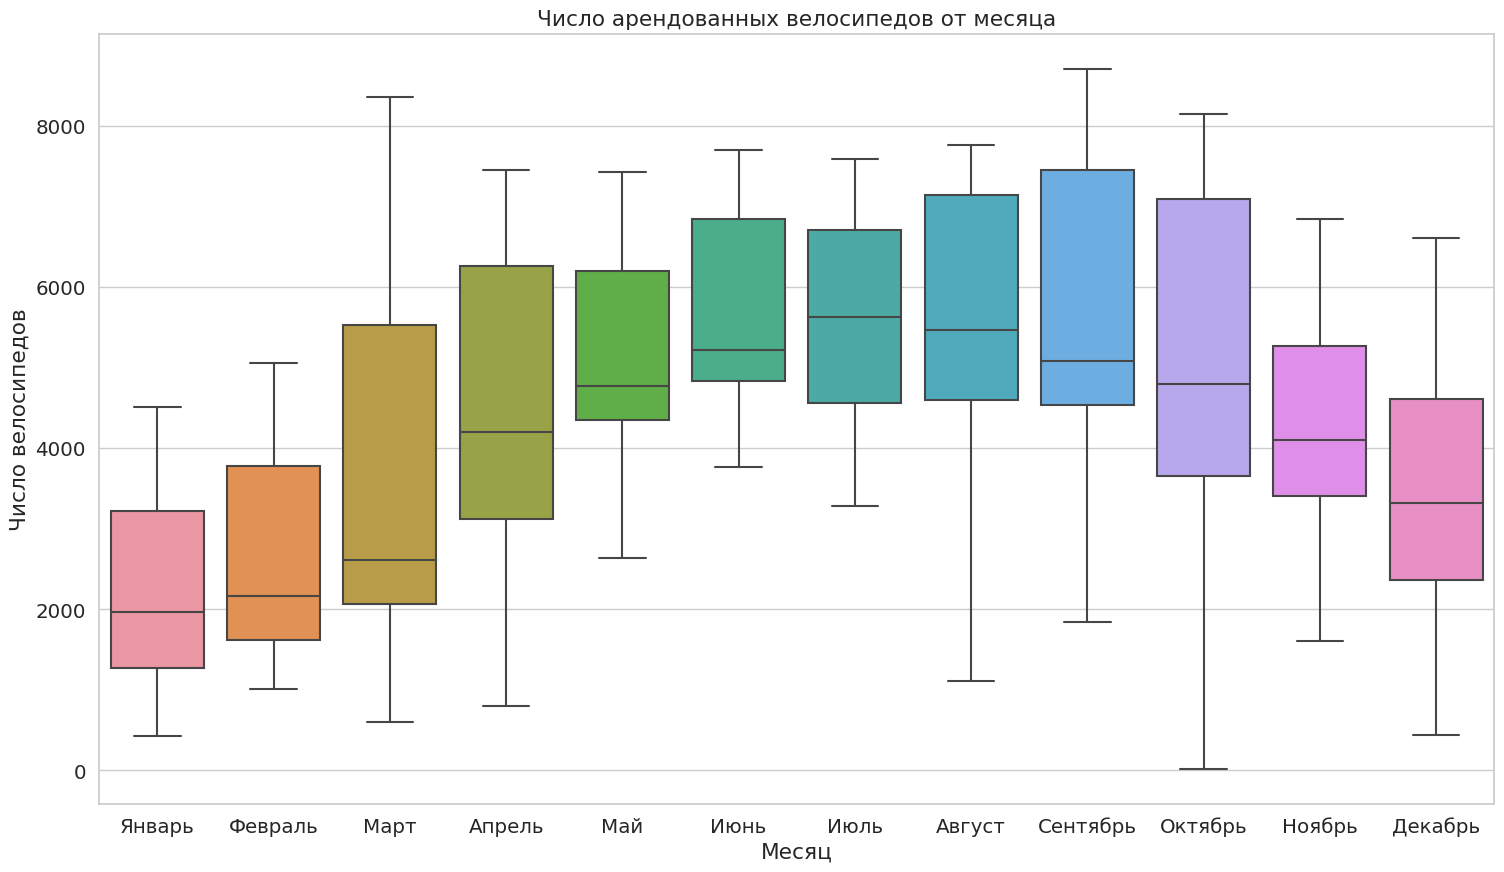

In [6]:
plt.figure(figsize=(18, 10))
f_day = sns.boxplot(data=train, x='mnth', y='cnt')

f_day.set(xticklabels=[
    'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август',
    'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'
],
          title='Число арендованных велосипедов от месяца',
          xlabel='Месяц',
          ylabel='Число велосипедов')

plt.show()

Видим, что в среднем больше велосипедов арендуют в "тёплые" месяца, с минимум в январе.

Месяц - категориальный признак, применять функции к нему нет смысла, не смотря на упорядоченность месяцов

#### Зависимость числа арендованных велосипедов от времени года

Информация по временам года полностью содержится в месяцах, однако посмотрим на эту зависимость.

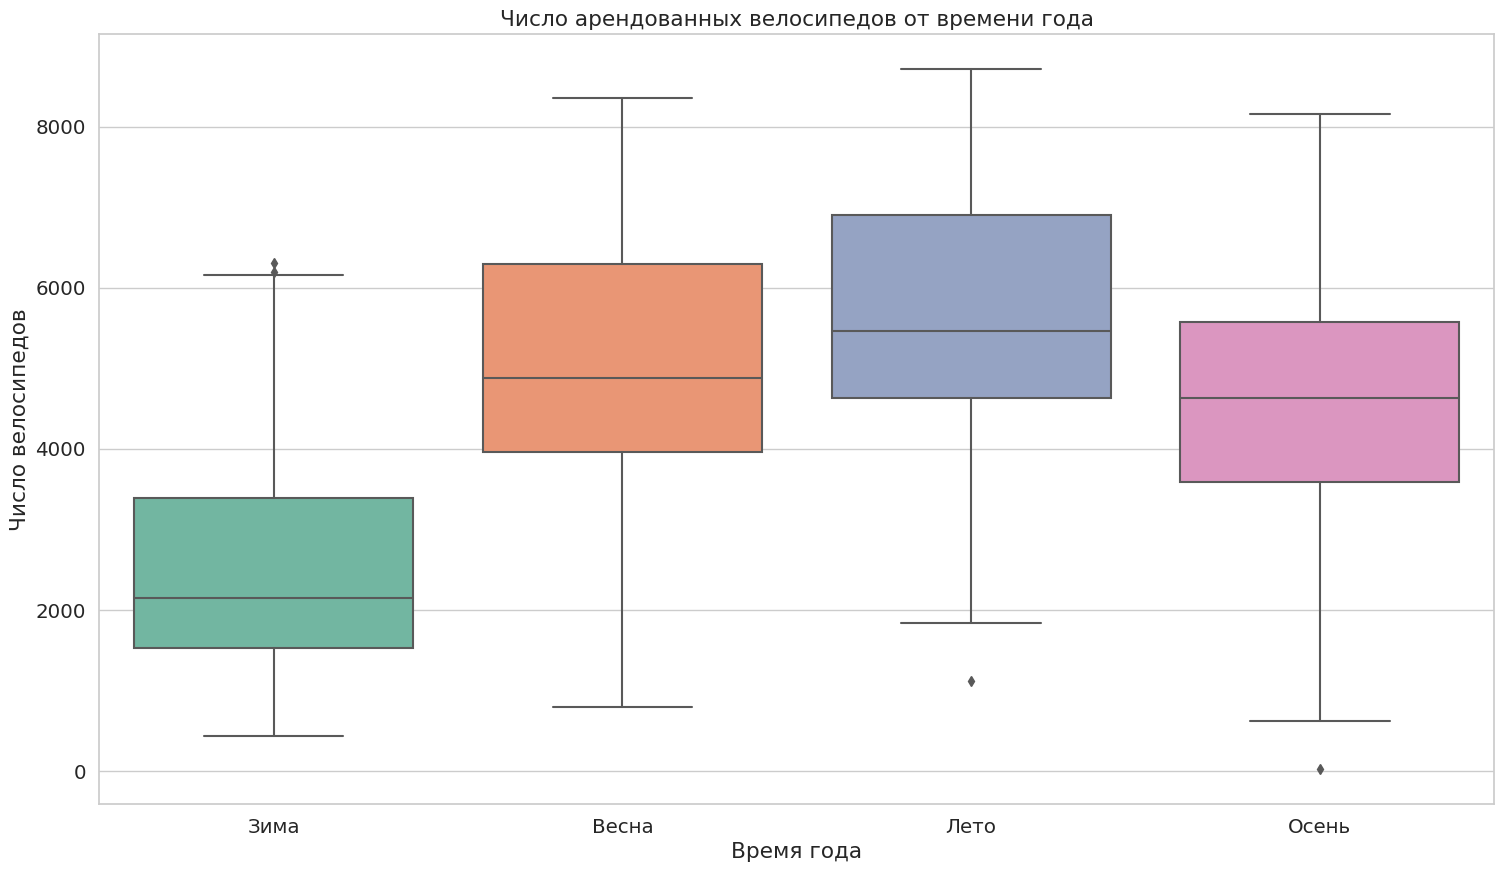

In [7]:
plt.figure(figsize=(18, 10))
f_day = sns.boxplot(data=train, x='season', y='cnt')

f_day.set(xticklabels=['Зима', 'Весна', 'Лето', 'Осень'],
          title='Число арендованных велосипедов от времени года',
          xlabel='Время года',
          ylabel='Число велосипедов')

plt.show()

На графике по временам года появляются выбросы, которые видны на boxplot'е. 

#### Зависимость числа арендованных велосипедов от дня недели

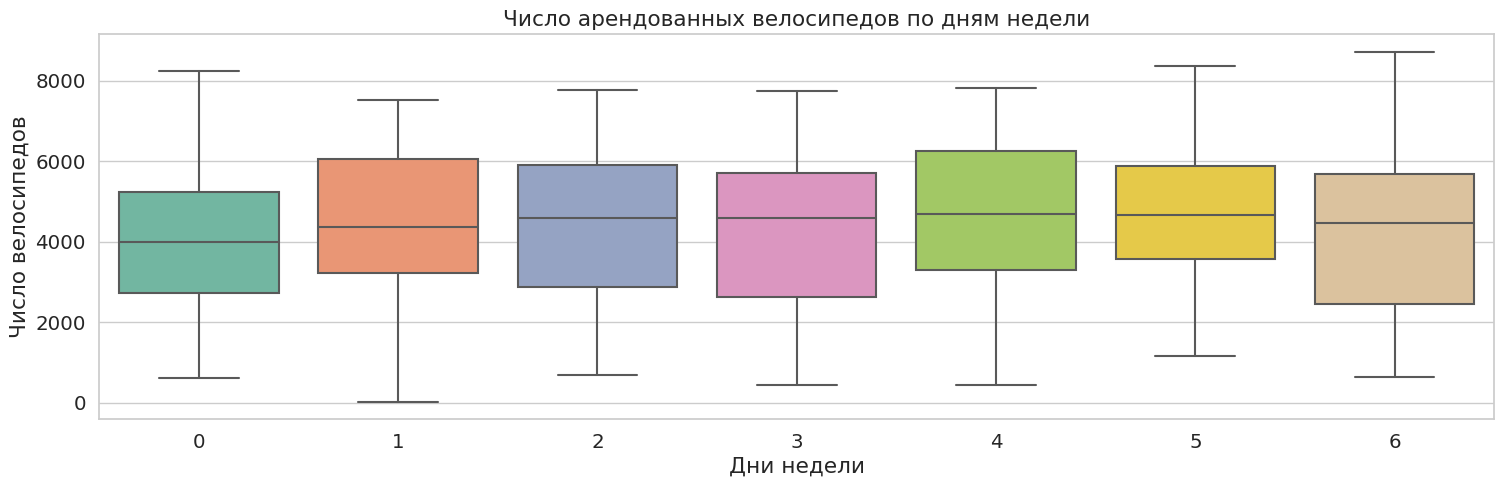

In [8]:
plt.figure(figsize=(18, 5))
f_day = sns.boxplot(data=train, x='weekday', y='cnt')

f_day.set(title='Число арендованных велосипедов по дням недели',
          xlabel='Дни недели',
          ylabel='Число велосипедов')

plt.show()

Видим, что относительные колебания числа велосипедов невелики, и тривиальной зависимости не наблюдается. Однако этот признак является важным, и его необходимо учитывать при построении модели.

Так как значения практически не отличаются, то нет смысла применять нелинейные функции

#### Зависимость числа арендованных велосипедов от типа дня

Рассмотрим сразу два похожих признака: Являтся ли день праздничным, и является ли он рабочим.

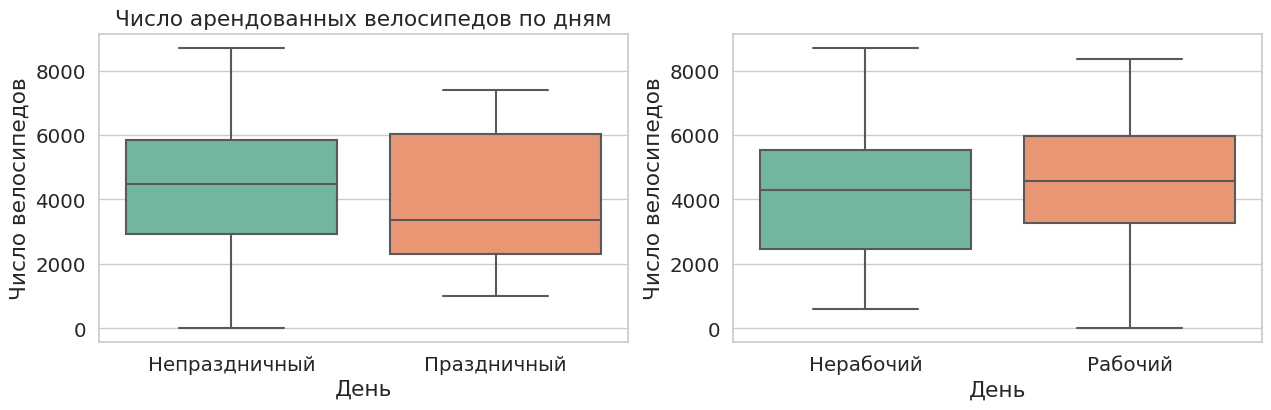

In [9]:
plt.figure(figsize=(15, 4))

# holiday plot
plt.subplot(121)
f = sns.boxplot(data=train, x='holiday', y='cnt')
f.set(xticklabels=['Непраздничный', 'Праздничный'],
      title='Число арендованных велосипедов по дням',
      xlabel='День',
      ylabel='Число велосипедов')

# workingday plot
plt.subplot(122)
f_type = sns.boxplot(data=train, x='workingday', y='cnt')
f_type.set(xticklabels=['Нерабочий', 'Рабочий'],
           xlabel='День',
           ylabel='Число велосипедов')

plt.show()

Видим, что в праздничный день арендуется меньше велосипедов, в нерабочий день число велосипедов также меньше, но разница между нерабочим и рабочим днём меньше. 

Каждый из этих признаков бинарный, и смысла рассматривать нелинейные функции нет.

#### Зависимость числа арендованных велосипедов от оценки благоприятности погоды

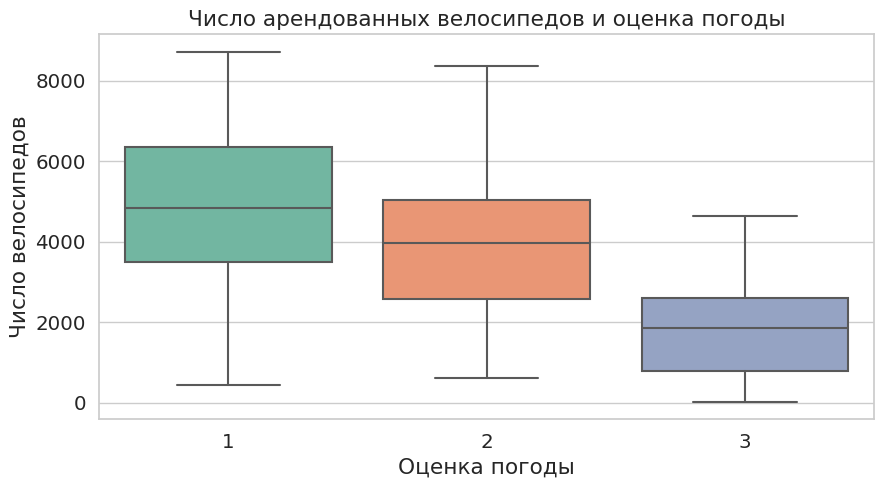

In [10]:
plt.figure(figsize=(10, 5))
f_day = sns.boxplot(data=train, x='weathersit', y='cnt')

f_day.set(title='Число арендованных велосипедов и оценка погоды',
          xlabel='Оценка погоды',
          ylabel='Число велосипедов')

plt.show()

In [11]:
print(
    f'Число дней с погодой с оценкой 4 равно: {len(train[train.weathersit == 4])}'
)

Число дней с погодой с оценкой 4 равно: 0


Оценка погоды это число от 1 до 4, но в данных нет дня с погодой с оценкой 4. При этом, как и следовало ожидать, число арендованных велосипедов уменьшается с ухудшением погоды.

Для данного признака нет смысла рассматривать нелинейные функции, тк. он категориальный и мы не можем разделить значения на осмысленные группы, для рассмотрения индикатора.  

#### Зависимость числа арендованных велосипедов от температуры

Из описания датасета узнаём, что темепература отнормирована по формулам: $$\frac{t-t_{min}}{t_{max}-t_{min}}, t_{min}=-8, t_{max}=+39$$ Для настоящей, и:
$$t_{min}=-16, t_{max}=+50$$ Для ощущаемой температуры.
Для графика приведём температуры(ощущаемую и реальную) к привычному виду.

In [12]:
train['temp'] = train['temp'].apply(lambda t: 47 * t - 8)
train['atemp'] = train['atemp'].apply(lambda t: 66 * t - 16)

#### Реальная температура:

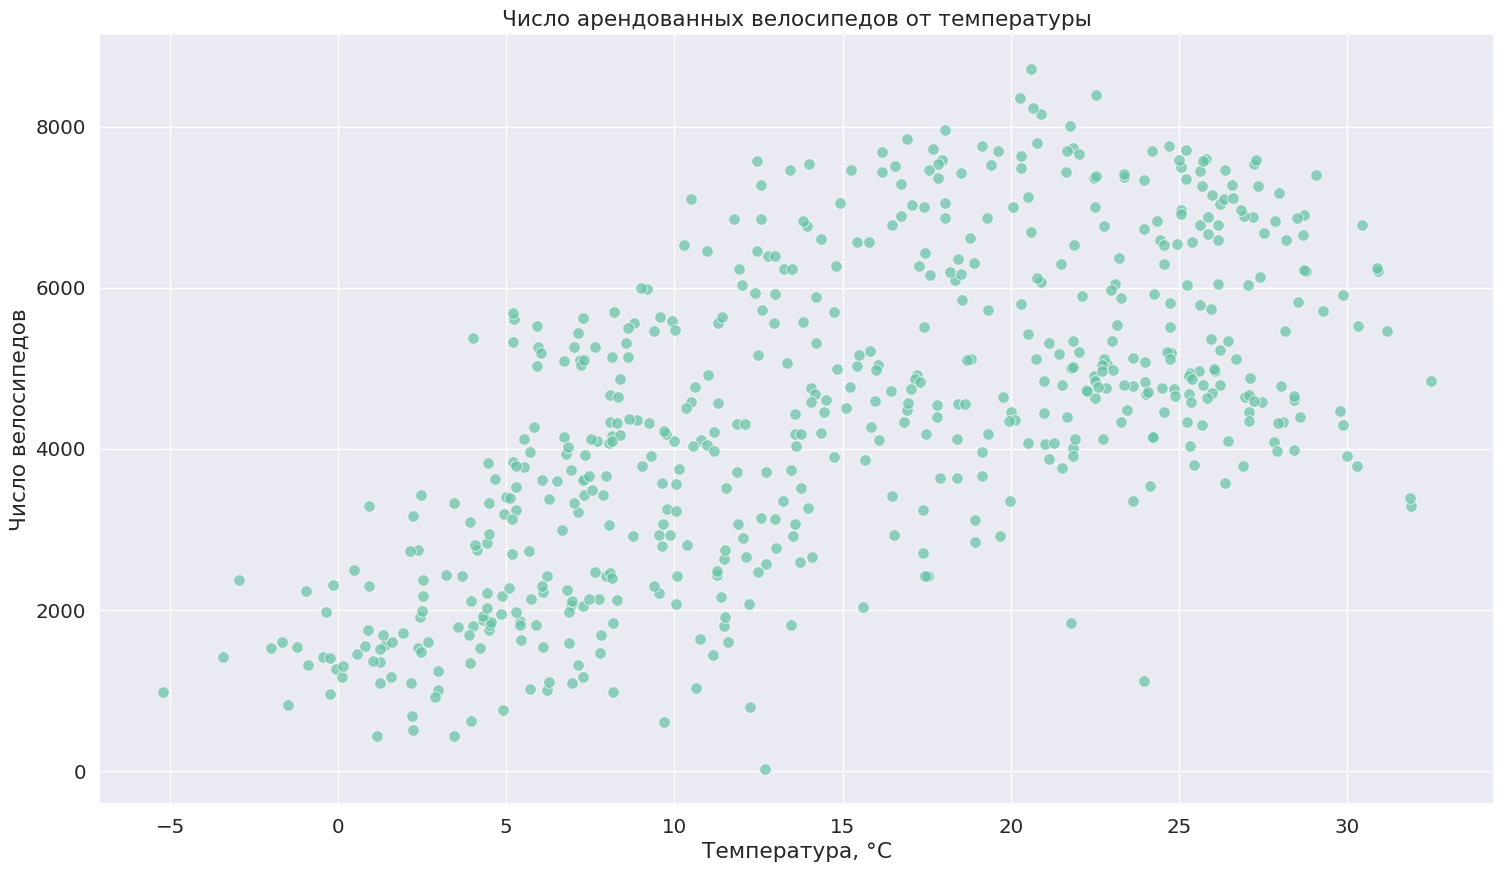

In [13]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(18, 10))
    f_day = sns.scatterplot(data=train, x='temp', y='cnt', s=70, alpha=0.7)
    f_day.set(title='Число арендованных велосипедов от температуры',
              xlabel='Температура, °C',
              ylabel='Число велосипедов')
    plt.show()

#### Ощущаемая температура:

Построим аналогичный график ощущаемой температуры

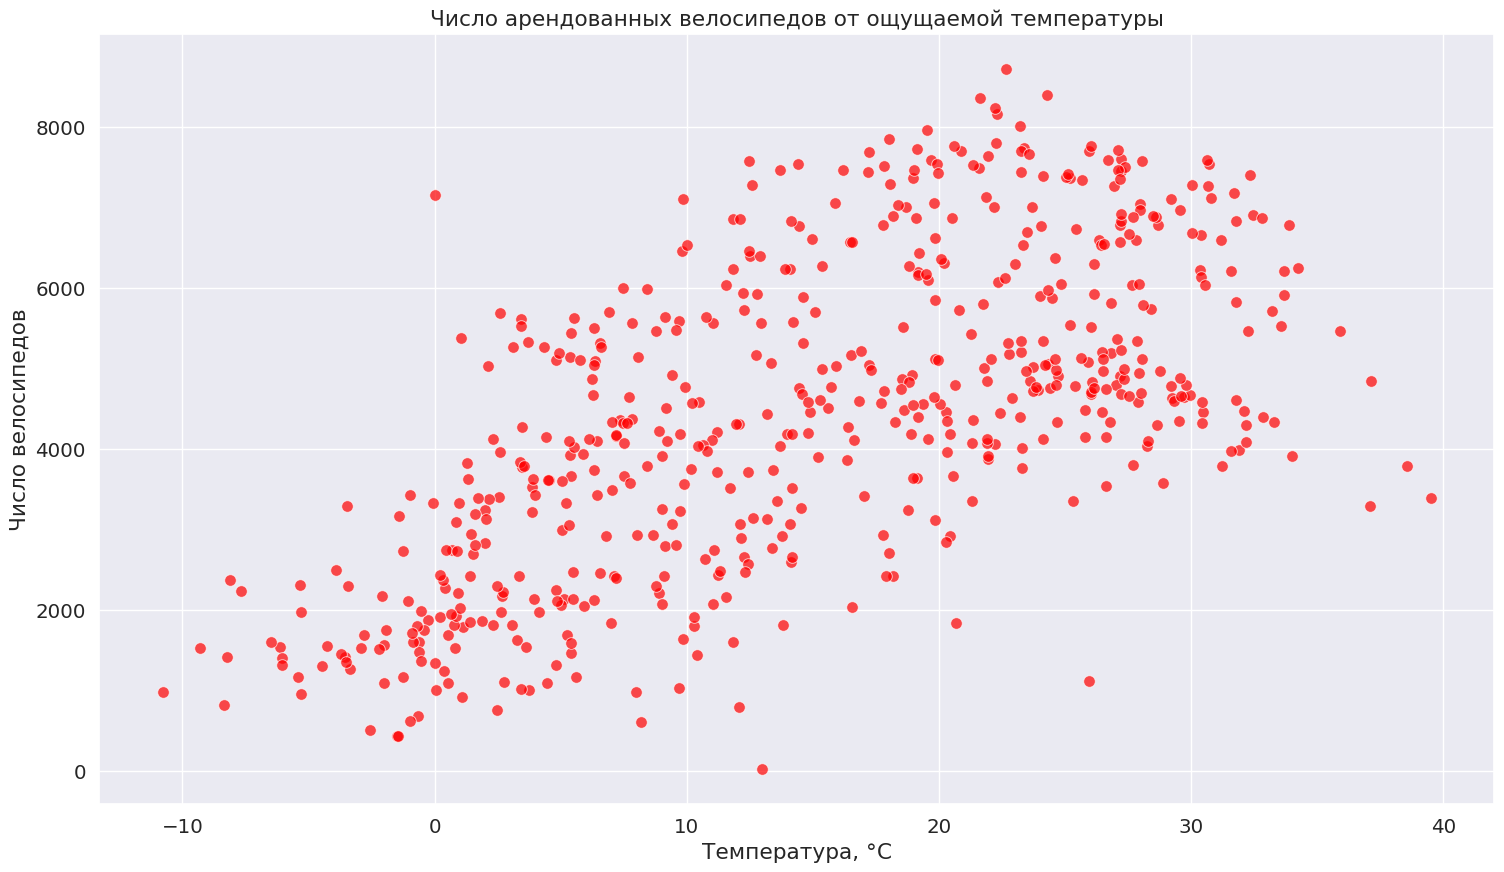

In [14]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(18, 10))
    f_day = sns.scatterplot(data=train,
                            x='atemp',
                            y='cnt',
                            s=70,
                            alpha=0.7,
                            color='r')
    f_day.set(title='Число арендованных велосипедов от ощущаемой температуры',
              xlabel='Температура, °C',
              ylabel='Число велосипедов')
    plt.show()

Посмотрим на точки нанесённые на один график

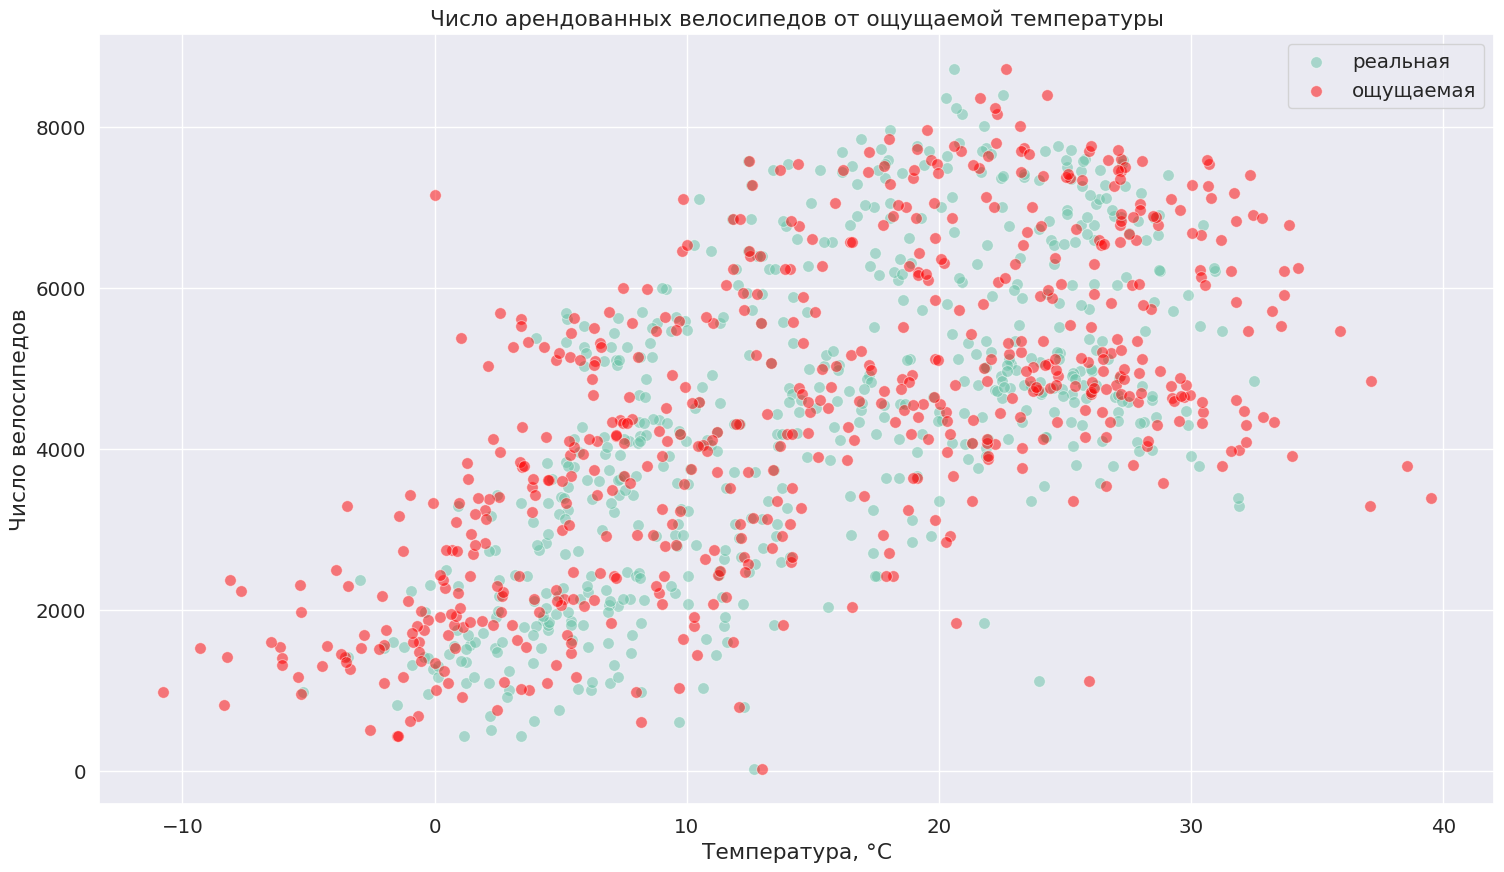

In [15]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(18, 10))
    f_day = sns.scatterplot(data=train,
                            x='temp',
                            y='cnt',
                            s=70,
                            alpha=0.5,
                            label='реальная')
    f_day = sns.scatterplot(data=train,
                            x='atemp',
                            y='cnt',
                            s=70,
                            alpha=0.5,
                            color='r',
                            legend=True,
                            label='ощущаемая')
    f_day.set(title='Число арендованных велосипедов от ощущаемой температуры',
              xlabel='Температура, °C',
              ylabel='Число велосипедов')
    plt.legend()
    plt.show()

На первом графике видно 2 выброса, на 2-м графике можно явно выделить 3 выброса. 
Оба графика показывают рост числа велосипедов с ростом температуры до температуры в ~20 градусов, затем, число велосипедов уменьшается. 

Рассматривать логарифмическую функцию нет смысла, т.к. температура может быть отрицательной. Квадратичную функцию не стоит рассматривать, она не убирает нелинейность зависимости, а также не различает -10 и +10, хотя число велосипедов для этих температур отличается.

#### Зависимость числа арендованных велосипедов от влажности

Вложность нормирована по максимальному значению равному 100, для графика приведём данные в изначальный вид.

In [16]:
train['hum'] = train['hum'].apply(lambda x: x * 100)

In [17]:
train.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
375,1,1,0,3,1,2,4.885849,2.666186,84.7500,0.131221,2177
32,1,2,0,3,1,2,4.220000,0.791522,77.5417,0.264308,1526
591,3,8,0,2,1,1,26.153349,28.667414,68.6667,0.169158,6784
376,1,1,0,4,1,2,9.977500,9.207908,80.2917,0.180967,4097
676,4,11,0,3,1,2,5.904151,2.124986,54.7500,0.304108,5035


Посмотрим на зависимость от влажности

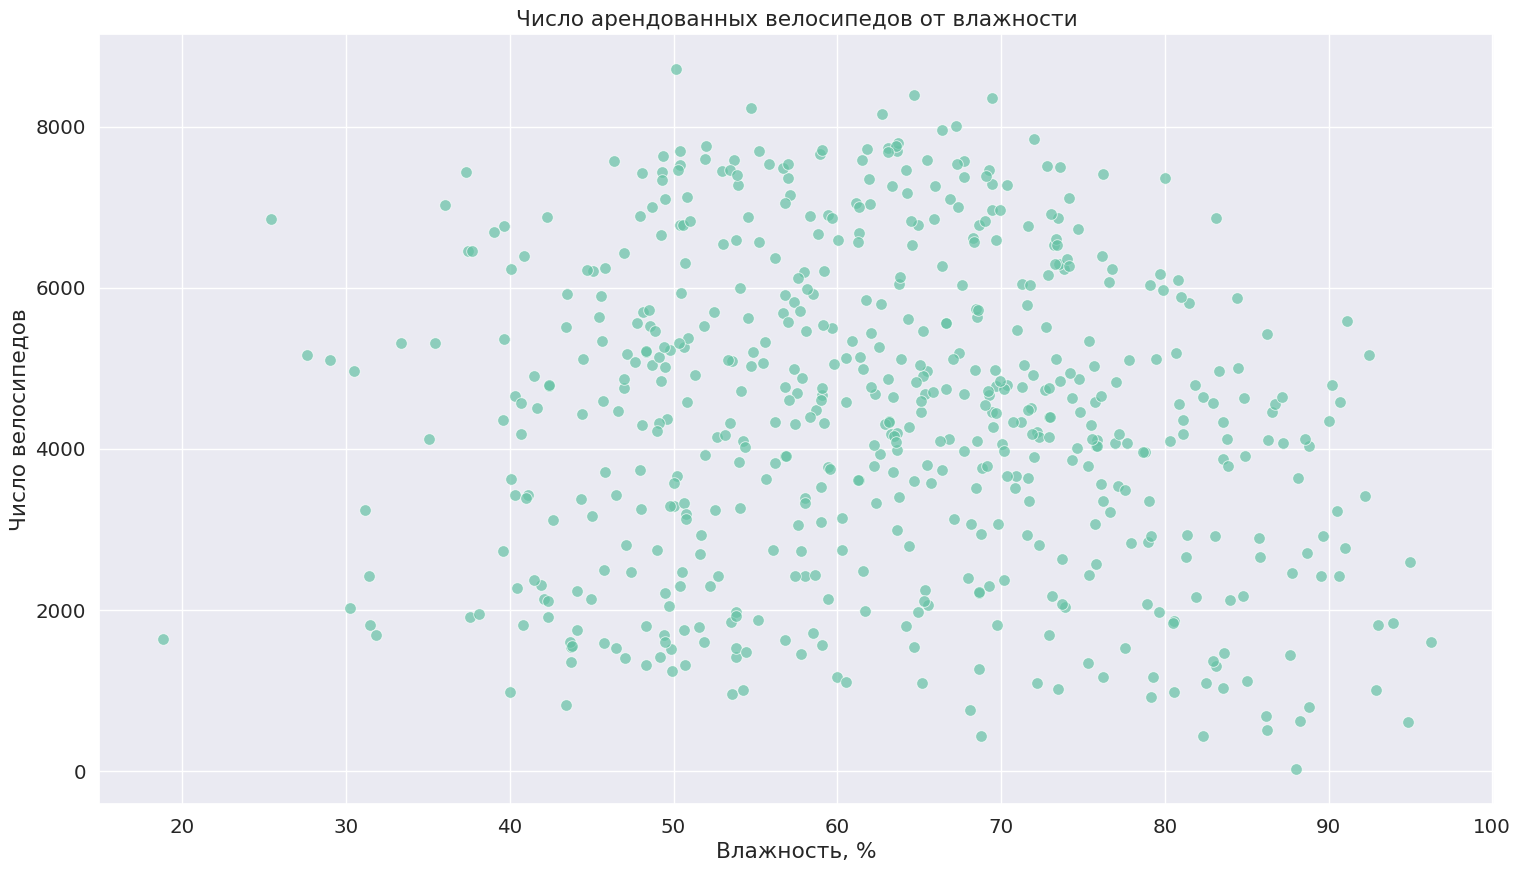

In [18]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(18, 10))
    f_day = sns.scatterplot(data=train, x='hum', y='cnt', s=70, alpha=0.7)
    f_day.set(title='Число арендованных велосипедов от влажности',
              xlabel='Влажность, %',
              ylabel='Число велосипедов')
    plt.show()

Видим 2 явных выброса с аномально маленькой влажность. Также можно наблюдать сильный разброс в числе велосипедов до ~70%, затем число велосипедов уменьшается с ростом влажность очень большой разброс в числе велосипедов.

В данном случае имеет смысл рассмотреть индикаторную функцию: I{x > 70} тк при такой влажности мы можем наблюдать спад числа велосипедов. 

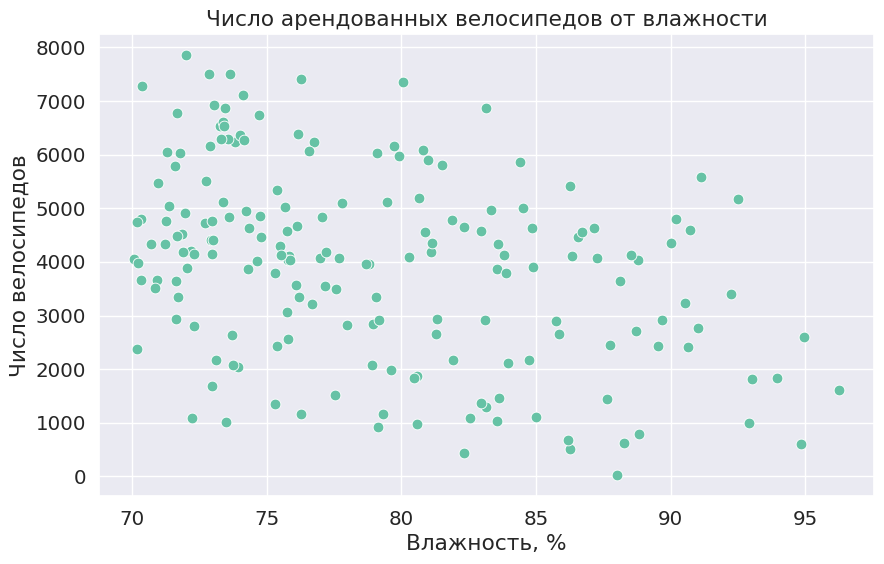

In [19]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(10, 6))
    f_day = sns.scatterplot(data=train[train.hum > 70], x='hum', y='cnt', s=60)

    f_day.set(title='Число арендованных велосипедов от влажности',
              xlabel='Влажность, %',
              ylabel='Число велосипедов')

    plt.show()

Видим что на этом графике с ростом влажности число велосипедов уменьшается.

#### Зависимость числа арендованных велосипедов от скорости ветра

Не будем изменять данные, т.к. нам не сказано какие еденицы измерения используются в нормировке

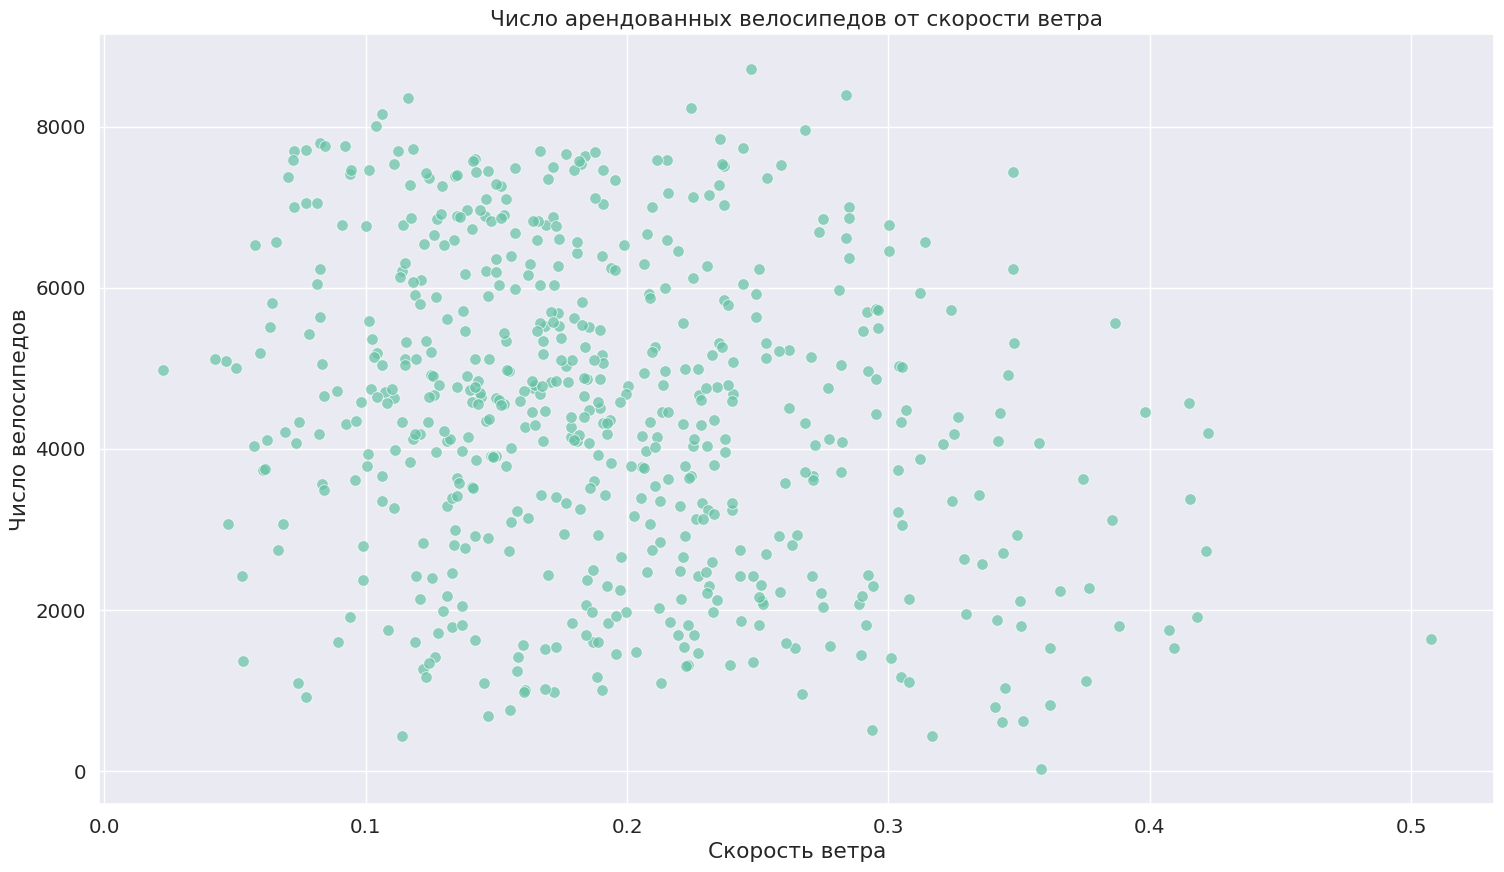

In [20]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(18, 10))
    f_day = sns.scatterplot(data=train,
                            x='windspeed',
                            y='cnt',
                            s=70,
                            alpha=0.7)

    f_day.set(title='Число арендованных велосипедов от скорости ветра',
              xlabel='Скорость ветра',
              ylabel='Число велосипедов')

    plt.show()

На графике наблюдается небольшой спад числа велосипедов с ростом скорости ветра, начиная с ~0.2. Также наблюдаютяся выбросы в той части, где число велосипедов уменьшается с ростом скорости ветра и их больше чем в предыдущих случаях. 

С точки зрения физики сопротивление воздуха при небольших скоростях квадратично зависит от скорости воздуха, поэтому имеет смысл рассмотреть квадратичную функцию, в данном случае этот признак будет иметь значение действущей на велосипедиста силы. 

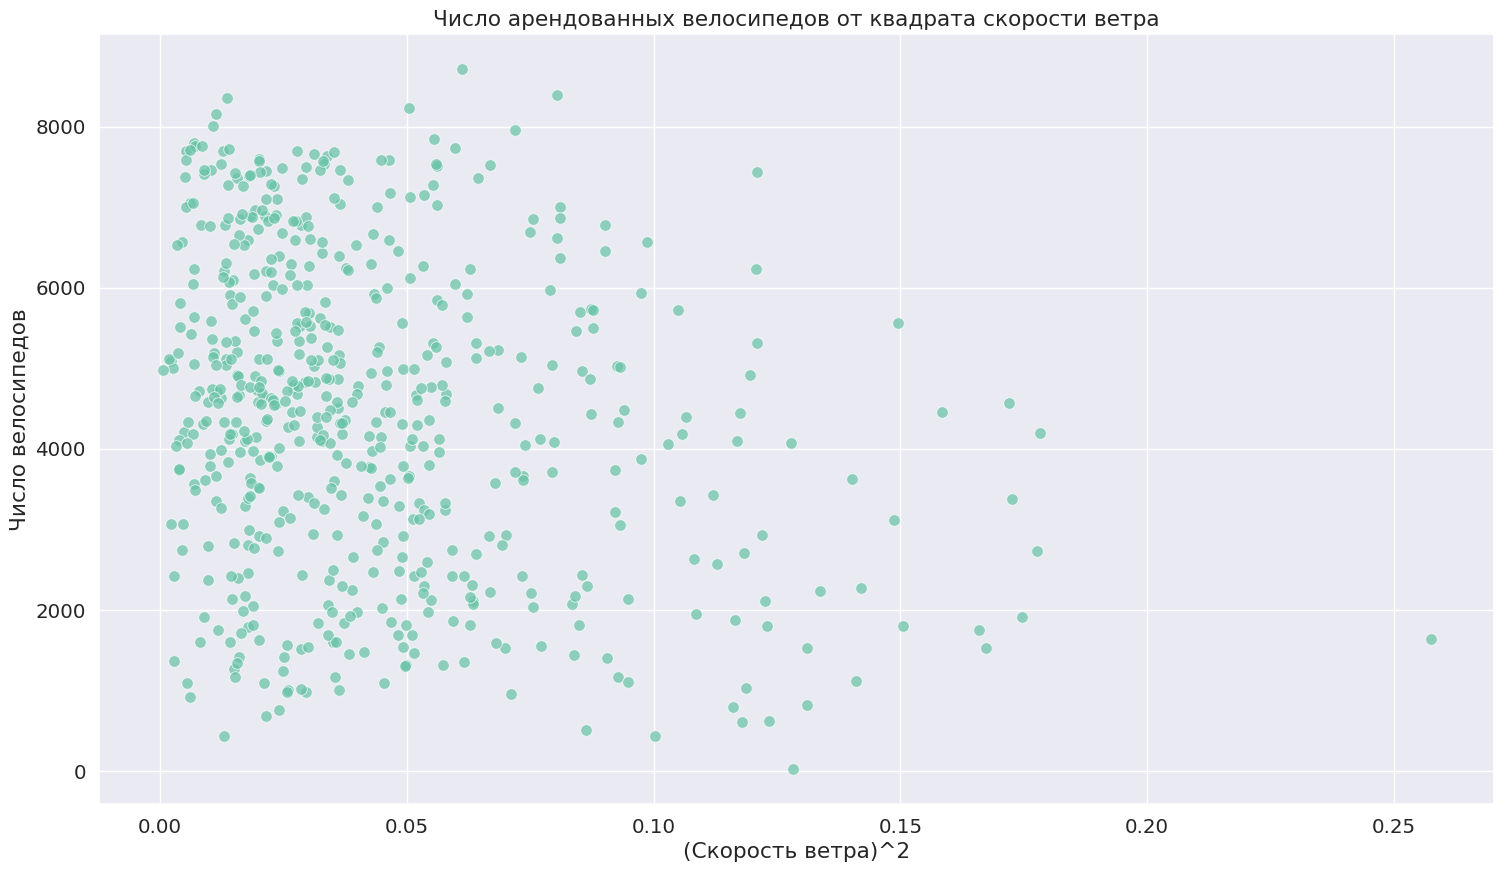

In [21]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(18, 10))
    f_day = sns.scatterplot(data=train,
                            x=train['windspeed'].apply(lambda t: t**2),
                            y='cnt',
                            s=70,
                            alpha=0.7)

    f_day.set(
        title='Число арендованных велосипедов от квадрата скорости ветра',
        xlabel='(Скорость ветра)^2',
        ylabel='Число велосипедов')

    plt.show()

На этом графике отчетливее прослеживается спад температуры с определённого значения, и отчетливее видны выбросы. Имеет смысл рассмотреть индикатор значения, с которого начинает уменьшатся число велосипедов. Посмотрим на композицию функций.

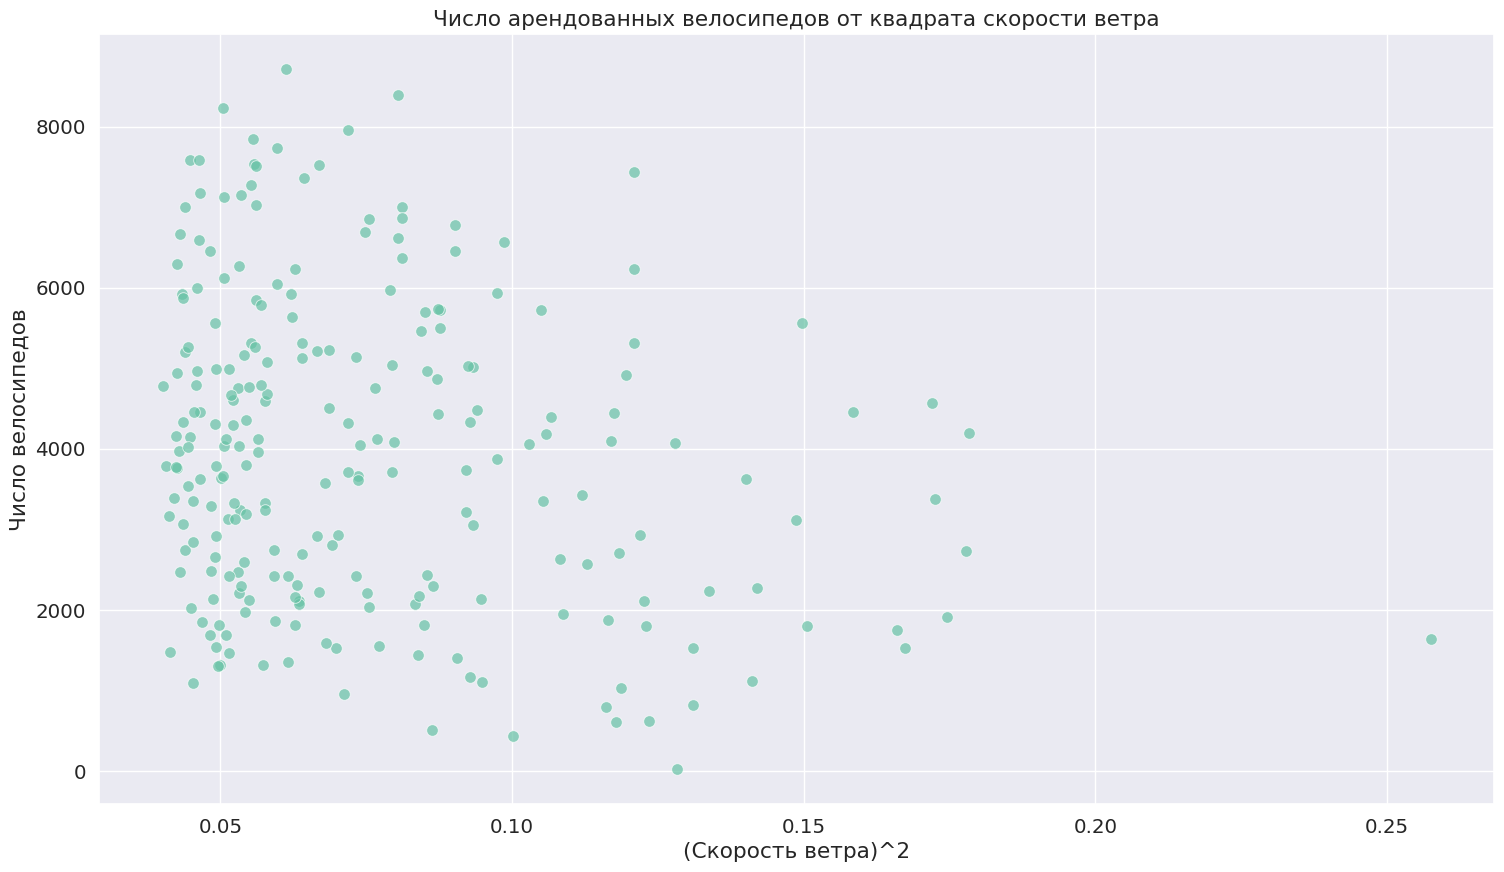

In [22]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(18, 10))
    f_day = sns.scatterplot(
        data=train,
        x=train[train.windspeed > 0.2]['windspeed'].apply(lambda t: t**2),
        y='cnt',
        s=70,
        alpha=0.7)

    f_day.set(
        title='Число арендованных велосипедов от квадрата скорости ветра',
        xlabel='(Скорость ветра)^2',
        ylabel='Число велосипедов')

    plt.show()

На таком ограниченном графике, можно проследить линейный спад числа велосипедов с ростом квадрата скорости ветра. Хоть и зависимость здесь далеко не самая отчётливая, этот график предоставялет больше информации чем просто график от скорости ветра

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:**

Число арендованных велосипедов зависит от месяца и как следствие от времён года, в "холодные" месяца спрос падает. От дня недели и от того является ли день рабочим или нет количество велосипедов мало зависит, а в праздничные дни велосипедов берут заметно больше. С ухудшением погоды подтвердилась гипотеза об уменьшении числа велосипедов.

Зависимость числа велосипедов от обычной и ощущаемой температуры нелинейна, но ярка выражена и объяснима: максимум достигается в наиболее комфортной для катания температуре. А зависимость от влажности и скорости ветра проявляется только начиная с критического значения.

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** Избавимся от выбросов

**b).** Закодируем категориальные признаки с помощью OneHotEncoder

**c).** Преобразуем вещественные признаки с помощью наиболее полезных функций

**c).** Объеденим преобразованные категориальные и вещественные признаки

Реализуйте данную процедуру.

Избавимся от выбросов в категориальных признаках. Выбросы присутствую только в распределении по временам года

In [23]:
train = train[((train.season == 1) & (train.cnt < 6000)) |
              ((train.season == 3) & (train.cnt > 1800))
              | ((train.season == 4) & (train.cnt > 200))
              | (train.season == 2)]

Избавимся от выбросов в зависимостях от температуры

In [24]:
train = train[(train.cnt > 100)
              & ((train.cnt > 2000) | (train.temp < 20)) &
              ((train.cnt > 2000) | (train.atemp < 20)) & ((train.cnt < 6000) |
                                                           (train.atemp > 5))]

Избавимся от выброса в влажности (на самом деле это не важно, т.к. мы будем рассматривать функцию, в которую выброс не попадает)

In [25]:
train = train[train.hum > 20]

Избавимся от выброса в скорости ветра

In [26]:
train = train[train.windspeed < 0.5]

Закодируем признаки

In [27]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(
    train[categorial_features])  # обучаем и кодируем

Преобразуем вещественные признаки

In [28]:
train['windspeed'] = train['windspeed'].apply(lambda x: x**2)

Соединим вместе вещественные признаки и закодированные категориальные

In [29]:
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [30]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])
# обучаем

# Выведем оценки коэффицентов
print(f"Оценки коэффицентов: {model.coef_}")
print(f"Свободный член: {model.intercept_}")

Оценки коэффицентов: [-9.92514339e-01  1.06368765e+02 -3.23499692e+01 -6.04611605e+03
  1.21881671e+03  1.05627465e+03  1.69196369e+03  2.70926530e+01
 -1.60026395e+02 -3.11851895e+02 -2.49064759e+02 -5.90372051e+02
 -9.83258804e+02 -4.30739855e+02  3.17680086e+02  4.26580771e+01
 -3.59077027e+02 -1.92269544e+02 -1.72534392e+02 -7.97215811e-01
  1.02424656e+02 -3.99501583e+00 -8.78611150e+00  2.19085547e+01
  3.29483118e+02  2.83289259e+02 -2.57036086e+02 -1.41880040e+03]
Свободный член: 4271.961535469917


Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

Преобразуем температуру и давление

In [31]:
test['temp'] = test['temp'].apply(lambda t: 47 * t - 8)
test['atemp'] = test['atemp'].apply(lambda t: 66 * t - 16)
test['hum'] = test['hum'].apply(lambda x: x * 100)

Уберём выбросы

In [32]:
test = test[((test.season == 1) & (test.cnt < 6000)) | ((test.season == 3) &
                                                        (test.cnt > 1800))
            | ((test.season == 4) & (test.cnt > 200))
            | (test.season == 2)]

test = test[(test.cnt > 100)
            & ((test.cnt > 2000) | (test.temp < 20)) &
            ((test.cnt > 2000) | (test.atemp < 20)) & ((test.cnt < 6000) |
                                                       (test.atemp > 5))]
test = test[test.hum > 20]
test = test[test.windspeed < 0.5]

Закодируем категориальные признаки

In [33]:
test_cat = encoder.transform(test[categorial_features])

Преобразуем вещественные признаки

In [34]:
test['windspeed'] = test['windspeed'].apply(lambda x: x**2)

Соединим признаки

In [35]:
X_test = np.hstack([test[real_features], test_cat])

Выполним предсказание построенной ранее моделью с помощью метода 

In [36]:
test_preds = model.predict(X_test)

Посчитаем ошибку по метрике RMSE

In [37]:
print(
    f'RMSE = {(metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5):.2f}'
)

RMSE = 1318.13


Посчитаем ошибку по метрике MAE

In [38]:
print(
    f'MAE = {(metrics.mean_absolute_error(test[target_feature], test_preds)):.2f}'
)

MAE = 1144.03


Посчитаем ошибку по метрике MAPE

In [39]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()


print(
    f'MAPE = {(mean_absolute_percentage_error(test[target_feature], test_preds)):.2f}%'
)

MAPE = 28.49%


Вывод

Мы можем предсказывать число арендованных велосипедов в произвольный день со средней точность в ~ 70%. Мы установили, что в данных присутствует небольшое число выбросов, например день, в которой число велосипедов равнялось нулю. Лучше всего число велосипедов зависит от погодных признаков, а также от тех, что связаны с погодными(например времена года). Также мы увидили что гипотеза о полезности рассмотрения кваратичной функции скорости подтвердилась.

Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

Формула для $\hat{\theta}$: $$\hat{\theta} = (X^TX)^{-1}X^TY$$

In [40]:
X_train_formula = np.concatenate((np.ones((len(X_train), 1)), X_train),
                                 axis=1)  # Добавим столбец единиц
Y_train_formula = np.array(train[target_feature])

# Посчитаем тета-с-скрышкой
theta = (np.linalg.inv(
    X_train_formula.T @ X_train_formula)) @ X_train_formula.T @ Y_train_formula
print(f"Оценки коэффицентов: {theta[1:]}")
print(f"Свободный член: {theta[0]}")

Оценки коэффицентов: [-5.63984581e+02  6.38144469e+02  6.75432884e+00  7.84757368e+04
  1.43455672e+03  2.13273552e+03  3.03112829e+03 -5.97878296e+02
 -1.23698693e+03 -2.89717040e+03 -3.05476536e+03 -3.79991318e+03
 -3.28447831e+03 -4.16653539e+03 -2.62553099e+03 -2.65958350e+03
 -3.11299323e+03 -2.73105206e+03 -9.55133616e+04  9.55892683e+04
  8.77630427e+04  8.94519305e+04  9.66548312e+04  9.90263958e+04
  3.29483118e+02 -8.68774134e+04 -2.57036086e+02 -1.41880040e+03]
Свободный член: -9077.24746893779


Выполним предсказание по получившейся оценке

In [41]:
X_test_formula = np.concatenate((np.ones((len(X_test), 1)), X_test),
                                axis=1)  # Добавим столбец единиц
test_preds_formula = X_test_formula @ theta

Посчитаем ошибки по различным метрикам

In [42]:
print(
    f'RMSE = {(metrics.mean_squared_error(test[target_feature], test_preds_formula) ** 0.5):.2f}'
)
print(
    f'MAE = {(metrics.mean_absolute_error(test[target_feature], test_preds_formula)):.2f}'
)
print(
    f'MAPE = {(mean_absolute_percentage_error(test[target_feature], test_preds_formula)):.2f}%'
)

RMSE = 7705.53
MAE = 6470.14
MAPE = 162.52%


Видим что ошибки возросли по всем метрикам, и по MAPE больше 100%. Это происходит из-за того, что между признаками существуют зависимости и столбцы матрицы X почти линейно зависимы. Таким образом матрица близка к вырожденной и погрешности вносят большой вклад в оценку $\hat{\theta}$

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Улучшим оценку избавившись от некоторых признаков. Ощущаемая температура является функцией параметров, часть которых участвует в оценке: Температура, влажность, скорость ветра. Является ли день рабочим зависит от того какой сейчас день недели, и является ли день праздничным, и сезон, очевидно, зависит от месяца.

In [43]:
new_categorial_features = ['mnth', 'holiday', 'weekday', 'weathersit']
new_real_features = ['temp', 'hum', 'windspeed']

Преобразуме категориальные признаки с помощью OneHotEncoder:

In [44]:
new_train_cat = encoder.fit_transform(train[new_categorial_features])
new_X_train = np.hstack([train[new_real_features], new_train_cat])

new_test_cat = encoder.transform(test[new_categorial_features])
new_X_test = np.hstack([test[new_real_features], new_test_cat])

Добавим столбец единиц

In [45]:
new_X_train_formula = np.concatenate((np.ones(
    (len(new_X_train), 1)), new_X_train),
                                     axis=1)
new_Y_train_formula = np.array(train[target_feature])

new_theta = (np.linalg.inv(new_X_train_formula.T @ new_X_train_formula)
             ) @ new_X_train_formula.T @ new_Y_train_formula

new_X_test_formula = np.concatenate((np.ones(
    (len(new_X_test), 1)), new_X_test),
                                    axis=1)
new_test_preds_formula = new_X_test_formula @ new_theta

Теперь посмотрим на результат

In [46]:
print(
    f'RMSE = {(metrics.mean_squared_error(test[target_feature], new_test_preds_formula) ** 0.5):.2f}'
)
print(
    f'MAE = {(metrics.mean_absolute_error(test[target_feature], new_test_preds_formula)):.2f}'
)
print(
    f'MAPE = {(mean_absolute_percentage_error(test[target_feature], new_test_preds_formula)):.2f}%'
)

RMSE = 1331.50
MAE = 1130.88
MAPE = 27.44%


Видно что результат стал гораздо лучше, более того, он превысил показатели значений полученных с помощью библиотеки sklearn, значит действительно, зависимость признаков друг от дргуа оказывает сильное негативное влияние на результат

Сделайте выводы.

**Выводы:**

Мы получили хорошие значения метрик двумя способами, с помощью формулы с лекции и с помощью библиотечной функции, можно сделать вывод, что нет одного "правильного" способа, и нужно действовать по ситуации и имеющимся данным

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

МНК: $$F(\theta) = ||Y - X\theta||^2 -> \min\limits_{\theta \in ℝ}$$
Ridge-регрессия:
$$G(\theta) = \| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta$$

$$\nabla G = 2X^TX\theta - 2X^TY + 2\lambda E \theta$$
Где E - еденичная матрица порядка d

Необходимое условие минимума:  $$\nabla G = 2X^TX\theta - 2X^TY + 2\lambda E \theta = 2(X^TX + \lambda E)\theta - 2X^TY = 0$$


Итого, получаем оценку $\theta$

$$\hat{\theta} = (X^TX + \lambda E)^{-1}X^TY$$

Оценка в модели ridge-регрессии отличается от оценки в МНК слагаемым $\lambda E$ в матрице, обратная которой домножается на $X^TY$. Таким образом, мы можем добавить $\lambda$ по диагонали к матрице $X^TX$ Чтобы сделать её "менее вырожденной", таким образом существует $\lambda$ при которой матрица невырождена, и мы можем найти для неё обратную

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

$$\theta_{k+1} = \theta_k - \eta \nabla G(\theta_k) = \theta_k - \eta (2(X^TX + \lambda E)\theta_k - 2X^TY)$$
Занося двойку в $\eta$: $$\theta_{k+1} = \theta_k - \eta (X^TX\theta_k + \lambda E\theta_k - X^TY)$$


В стохастическом градиентном спуске сумма считается по случайному набору слогаемых. 
$$\theta_{k+1} = \theta_k - \left(\frac{\eta n}{m} {\sum_{i \in I}x_i(x_i^T\theta_k - y_i)}\right) + \eta \lambda \theta_k ,$$ где $I$ - батч размера m, выбираемый случайно на каждой итерации, т.е случайное мультимножество чисел постоянного размера m от 1 до n: $$I = \{i_1, i_2... i_m\}$$
$$i_1, i_2... i_n \sim \cup\{1, 2... n\}, \ выбираются \ независимо \ с \ повторениями $$ а $\frac{ n}{m}$ - нормирующий множитель, а $x_i$  - вектор соответсвущий строке X.

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

Воспользуемся методом размерностей. Если признаки имеют различные еденицы измерения, т.е. разные размерности, то коэффиценты имеют размерность таргетного признака, разделённую на размерность соответсвущего признака, другими словами, размерности коэффицентов также различны. Тогда в случае Ridge-регрессии когда мы рассматриваем $||\theta||^2$ - т.е.скалярное произведение, мы суммируем коэффиценты различных размерностей. Поэтому необходимо обезразмерить признаки, т.е. привести все коэффиценты к размерности таргетного признака. Стандартизация обезразмеривает признаки, т.к. и в числителе и в знаменателе стоят величины одной размерности.

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

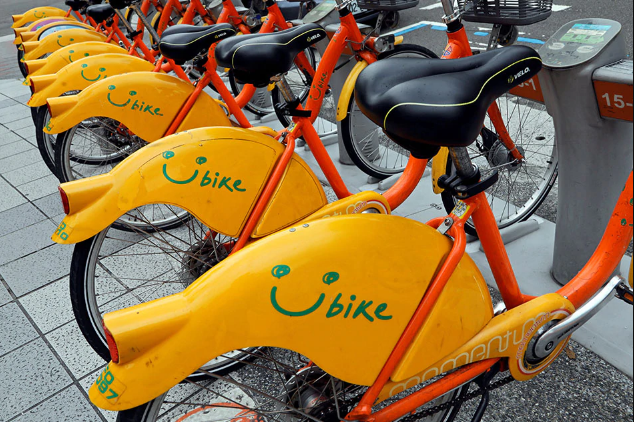

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [47]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.
        
        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''

        self.lambd = lambd
        self.fit_intercept = fit_intercept

    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''

        # Посчитайте оценки коэффициентов и, возможно,
        # еще что-то, что пригодится в predict.
        if self.fit_intercept:
            X_ones = np.concatenate((np.ones((len(X), 1)), X), axis=1)
        else:
            X_ones = X
        self.theta = (np.linalg.inv(X_ones.T @ X_ones + self.lambd *
                                    np.identity(len(X_ones.T)))) @ X_ones.T @ Y
        return self

    def predict(self, X):
        '''
        Вычисление предсказаний.
        
        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        
        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''

        # Посчитайте предсказания
        if self.fit_intercept:
            X_ones = np.concatenate((np.ones((len(X), 1)), X), axis=1)
        else:
            X_ones = X
        predictions = X_ones @ self.theta
        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [48]:
train, test = train_test_split(data, test_size=0.4, random_state=3)
test, valid = train_test_split(test, test_size=0.5, random_state=4)

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

Оставим только указанные в задаче 2 признаки

In [49]:
train = train[categorial_features + real_features + [target_feature]]
test = test[categorial_features + real_features + [target_feature]]
valid = valid[categorial_features + real_features + [target_feature]]

Переведём признаки к изначальному виду, чтобы удалить выбросы

In [50]:
train['temp'] = train['temp'].apply(lambda t: 47 * t - 8)
train['atemp'] = train['atemp'].apply(lambda t: 66 * t - 16)
train['hum'] = train['hum'].apply(lambda x: x * 100)

valid['temp'] = valid['temp'].apply(lambda t: 47 * t - 8)
valid['atemp'] = valid['atemp'].apply(lambda t: 66 * t - 16)
valid['hum'] = valid['hum'].apply(lambda x: x * 100)

test['temp'] = test['temp'].apply(lambda t: 47 * t - 8)
test['atemp'] = test['atemp'].apply(lambda t: 66 * t - 16)
test['hum'] = test['hum'].apply(lambda x: x * 100)

Избавимся от выбросов, будем избавляться по отдельности в каждом из сетов данных, чтобы избежать возможных проблем

In [51]:
train = train[((train.season == 1) & (train.cnt < 6000)) |
              ((train.season == 3) & (train.cnt > 1800))
              | ((train.season == 4) & (train.cnt > 200))
              | (train.season == 2)]

train = train[(train.cnt > 100)
              & ((train.cnt > 2000) | (train.temp < 20)) &
              ((train.cnt > 2000) | (train.atemp < 20)) & ((train.cnt < 6000) |
                                                           (train.atemp > 5))]
train = train[train.hum > 20]
train = train[train.windspeed < 0.5]

In [52]:
valid = valid[((valid.season == 1) & (valid.cnt < 6000)) |
              ((valid.season == 3) & (valid.cnt > 1800))
              | ((valid.season == 4) & (valid.cnt > 200))
              | (valid.season == 2)]

valid = valid[(valid.cnt > 100)
              & ((valid.cnt > 2000) | (valid.temp < 20)) &
              ((valid.cnt > 2000) | (valid.atemp < 20)) & ((valid.cnt < 6000) |
                                                           (valid.atemp > 5))]
valid = valid[valid.hum > 20]
valid = valid[valid.windspeed < 0.5]

In [53]:
test = test[((test.season == 1) & (test.cnt < 6000)) | ((test.season == 3) &
                                                        (test.cnt > 1800))
            | ((test.season == 4) & (test.cnt > 200))
            | (test.season == 2)]

test = test[(test.cnt > 100)
            & ((test.cnt > 2000) | (test.temp < 20)) &
            ((test.cnt > 2000) | (test.atemp < 20)) & ((test.cnt < 6000) |
                                                       (test.atemp > 5))]
test = test[test.hum > 20]
test = test[test.windspeed < 0.5]

Применим к данным рассматриваемые в задаче 2 функции

In [54]:
train['windspeed'] = train['windspeed'].apply(lambda x: x**2)

valid['windspeed'] = valid['windspeed'].apply(lambda x: x**2)

test['windspeed'] = test['windspeed'].apply(lambda x: x**2)

Преобразуем категориальные

In [55]:
encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(
    train[categorial_features])  # обучаем и кодируем
valid_cat = encoder.transform(valid[categorial_features])  # кодируем
test_cat = encoder.transform(test[categorial_features])  # кодируем

Соеденим признаки

In [56]:
X_train = np.hstack([train[real_features], train_cat])
X_valid = np.hstack([valid[real_features], valid_cat])
X_test = np.hstack([test[real_features], test_cat])

Проведём стандартизацию признаков

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [58]:
X_valid = scaler.transform(X_valid)

In [59]:
X_test = scaler.transform(X_test)

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [60]:
lambda_mesh = np.logspace(-2, 7, 400)
models_mesh = []
for i in range(400):
    regression = RidgeRegression(lambd=lambda_mesh[i])
    regression.fit(X_train, train[target_feature])
    models_mesh.append(regression)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

In [61]:
train_errors, valid_errors = [[], [], []], [[], [], []]
for i in models_mesh:
    train_pred = i.predict(X_train)
    valid_pred = i.predict(X_valid)

    train_errors[0].append(
        metrics.mean_squared_error(train[target_feature], train_pred)**0.5)
    valid_errors[0].append(
        metrics.mean_squared_error(valid[target_feature], valid_pred)**0.5)

    train_errors[1].append(
        metrics.mean_absolute_error(train[target_feature], train_pred))
    valid_errors[1].append(
        metrics.mean_absolute_error(valid[target_feature], valid_pred))

    train_errors[2].append(
        metrics.mean_absolute_percentage_error(train[target_feature],
                                               train_pred))
    valid_errors[2].append(
        metrics.mean_absolute_percentage_error(valid[target_feature],
                                               valid_pred))

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

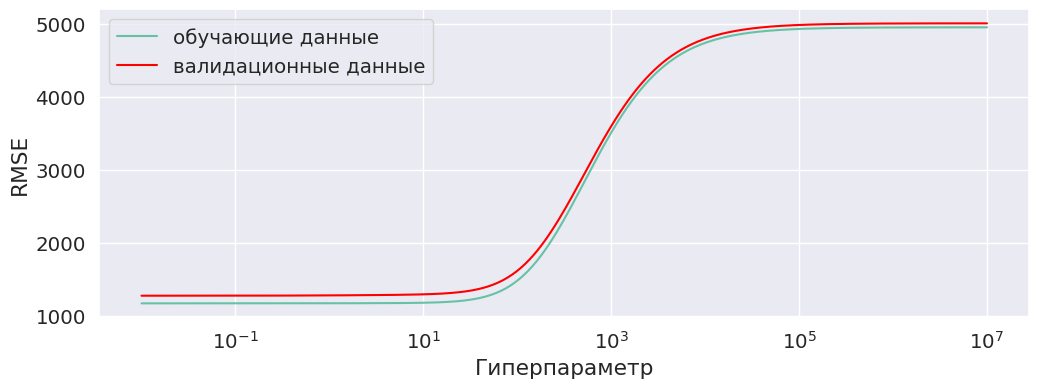

In [62]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12, 4))
    plt.plot(lambda_mesh, train_errors[0])
    plt.plot(lambda_mesh, valid_errors[0], color='r')
    plt.legend(['обучающие данные', 'валидационные данные'])
    plt.xlabel('Гиперпараметр')
    plt.ylabel('RMSE')
    plt.xscale("log")
    plt.show()

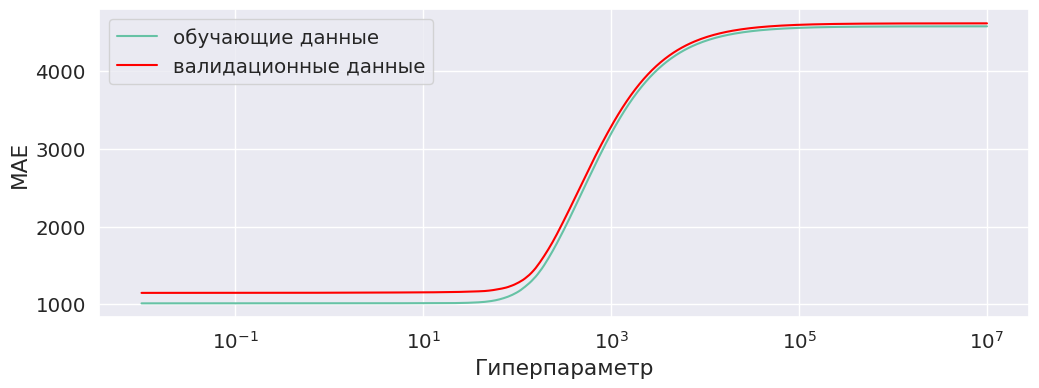

In [63]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12, 4))
    plt.plot(lambda_mesh, train_errors[1])
    plt.plot(lambda_mesh, valid_errors[1], color='r')
    plt.legend(['обучающие данные', 'валидационные данные'])
    plt.xlabel('Гиперпараметр')
    plt.ylabel('MAE')
    plt.xscale("log")
    plt.show()

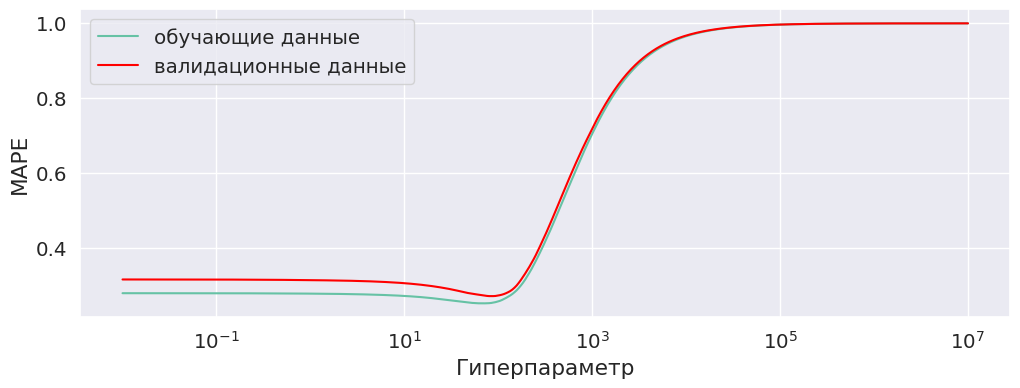

In [64]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12, 4))
    l1 = plt.plot(lambda_mesh, train_errors[2])
    l2 = plt.plot(lambda_mesh, valid_errors[2], color='r')
    plt.legend(['обучающие данные', 'валидационные данные'])
    plt.xlabel('Гиперпараметр')
    plt.ylabel('MAPE')
    plt.xscale("log")
    plt.show()

Видим, что значений метрик для обучающей и валидационной выборок ведут себя схожим образом. Также видим, что выраженный минимум есть только у графика метрики MAPE

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

In [65]:
train.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [66]:
colors = 3 * ['r'] + 11 * ['y'] + ['g'] + 6 * ['b'] + [
    'black'
] + 2 * ['orange'] + ['purple'] + ['pink'] + ['lime'] + ['cyan']

labels = train.columns[:-1]

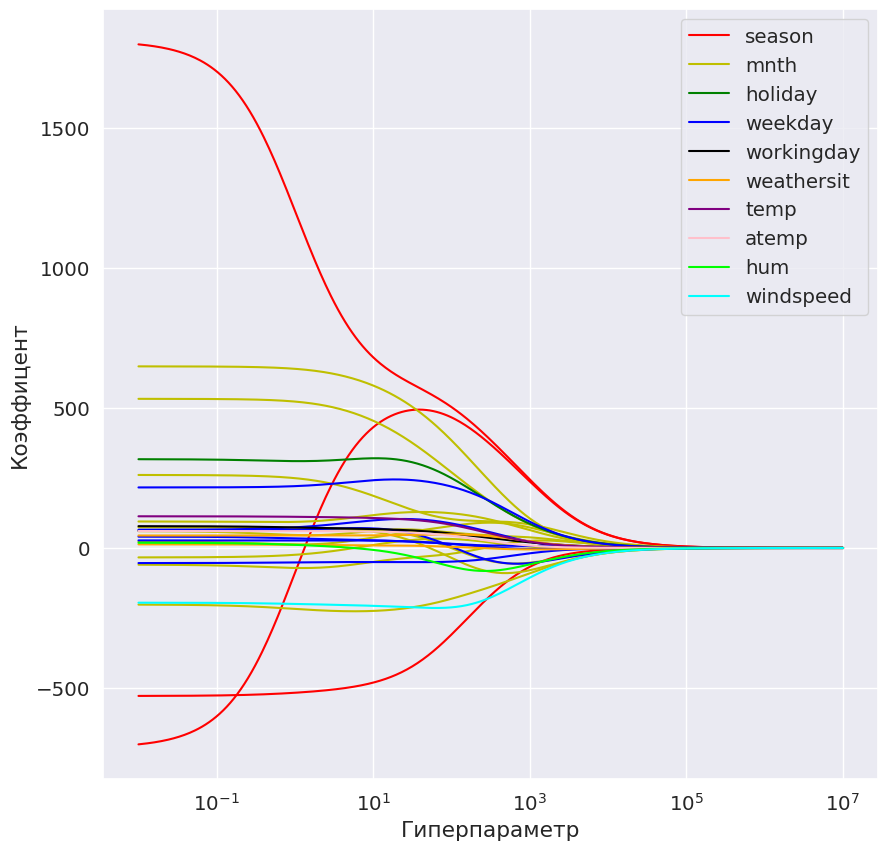

In [67]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(10, 10))
    cnt = 0
    for i in range(len(regression.theta) - 1):
        l1 = [x.theta[i + 1] for x in models_mesh]
        if colors[i] == colors[i - 1]:
            plt.plot(lambda_mesh, l1, color=colors[i])
        else:
            plt.plot(lambda_mesh, l1, color=colors[i], label=labels[cnt])
            cnt += 1
    plt.legend()
    plt.xlabel('Гиперпараметр')
    plt.ylabel('Коэффицент')
    plt.xscale("log")
    plt.show()

Видим что при увеличении значения гиперпараметра коэффиценты стремятся к нулю.

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Исходя из того, что выраженный минимум есть только у графика метрики MAPE, можно сделать предположение, что лучше всего будет оптимизировать параметр $\lambda$ именно по этой метрики.

Выберем параметр $\lambda$, оптимизирующий метрику MAPE:

In [68]:
param = lambda_mesh[valid_errors[2].index(min(valid_errors[2]))]
param

84.10310505352605

In [69]:
final_model = RidgeRegression(lambd=param)
final_model.fit(X_train, train[target_feature])
prediction = final_model.predict(X_test)
print(
    f'RMSE = {(metrics.mean_squared_error(test[target_feature], prediction) ** 0.5):.2f}'
)
print(
    f'MAE = {(metrics.mean_absolute_error(test[target_feature], prediction)):.2f}'
)
print(
    f'MAPE = {(mean_absolute_percentage_error(test[target_feature], prediction)):.2f}%'
)

RMSE = 1364.35
MAE = 1063.66
MAPE = 28.69%


Выберем параметр $\lambda$, оптимизирующий метрику MAE:

In [70]:
param = lambda_mesh[valid_errors[1].index(min(valid_errors[1]))]
param

0.01

Видим, что в качестве параметра мы взяли нулевой элемент $\lambda$-сетки

In [71]:
final_model = RidgeRegression(lambd=param)
final_model.fit(X_train, train[target_feature])
prediction = final_model.predict(X_test)
print(
    f'RMSE = {(metrics.mean_squared_error(test[target_feature], prediction) ** 0.5):.2f}'
)
print(
    f'MAE = {(metrics.mean_absolute_error(test[target_feature], prediction)):.2f}'
)
print(
    f'MAPE = {(mean_absolute_percentage_error(test[target_feature], prediction)):.2f}%'
)

RMSE = 1343.03
MAE = 1149.51
MAPE = 36.42%


Выберем параметр $\lambda$, оптимизирующий метрику RMSE:

In [72]:
param = lambda_mesh[valid_errors[0].index(min(valid_errors[0]))]
param

0.01

In [73]:
final_model = RidgeRegression(lambd=param)
final_model.fit(X_train, train[target_feature])
prediction = final_model.predict(X_test)
print(
    f'RMSE = {(metrics.mean_squared_error(test[target_feature], prediction) ** 0.5):.2f}'
)
print(
    f'MAE = {(metrics.mean_absolute_error(test[target_feature], prediction)):.2f}'
)
print(
    f'MAPE = {(mean_absolute_percentage_error(test[target_feature], prediction)):.2f}%'
)

RMSE = 1343.03
MAE = 1149.51
MAPE = 36.42%


Видим, что действительно, в случае оптимизации $\lambda$ по RMSE или MAE значения этих метрик практически не отличаются от значений этих метрик полученных при оптимизации MAPE, однако значение MAPE, из-за того что у него есть явный минимум, больше. Т.е. надо оптимизировать по метрике MAPE

Сделайте выводы.

Для получения наилучших результатов необходимо оптимизирвоать значение гиперпараметра по метрике, которая имеет минимум как функция от гиперпараметра, в данном случае это MAPE. Мы третий раз получаем значения метрик мало отличающиеся друг от друга, действуя различными методами, Ridge-регрессия в данном случае даёт результат не хуже чем прошлые методы

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

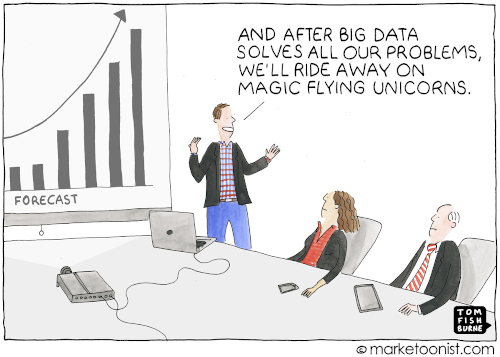

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [74]:
train, test = train_test_split(data, test_size=0.4, random_state=3)
test, valid = train_test_split(test, test_size=0.5, random_state=4)

train = train[categorial_features + real_features + [target_feature]]
test = test[categorial_features + real_features + [target_feature]]
valid = valid[categorial_features + real_features + [target_feature]]

encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель

train_cat = encoder.fit_transform(
    train[categorial_features])  # обучаем и кодируем
X_train = np.hstack([train[real_features], train_cat])
X_train = scaler.fit_transform(X_train)  # Проведём стандартизацию

validate_cat = encoder.transform(valid[categorial_features])
X_valid = np.hstack([valid[real_features], validate_cat])
X_valid = scaler.transform(X_valid)  # Проведём стандартизацию

test_cat = encoder.transform(test[categorial_features])
X_test = np.hstack([test[real_features], test_cat])
X_test = scaler.transform(X_test)  # Проведём стандартизацию

In [75]:
X_train = np.hstack([X_train, np.ones((len(X_train), 1))])
X_valid = np.hstack([X_valid, np.ones((len(X_valid), 1))])
X_test = np.hstack([X_test, np.ones((len(X_test), 1))])
X_train.shape

(438, 29)

In [76]:
theta = np.ones(29)

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

In [77]:
def SGD(theta: np.ndarray) -> np.ndarray:
    batch = np.random.choice(len(X_train), 256)

    x = X_train[batch]
    y = train[target_feature].values[batch]

    return theta - 0.001 * ((x.T @ x @ theta - x.T @ y) *
                            (len(X_train) / 256) + param * theta)

In [78]:
train_errors, valid_errors = [[], [], []], [[], [], []]
for i in range(100):
    train_pred = X_train @ theta
    valid_pred = X_valid @ theta

    train_errors[0].append(
        metrics.mean_squared_error(train[target_feature], train_pred)**0.5)
    valid_errors[0].append(
        metrics.mean_squared_error(valid[target_feature], valid_pred)**0.5)

    train_errors[1].append(
        metrics.mean_absolute_error(train[target_feature], train_pred))
    valid_errors[1].append(
        metrics.mean_absolute_error(valid[target_feature], valid_pred))

    train_errors[2].append(
        mean_absolute_percentage_error(train[target_feature], train_pred))
    valid_errors[2].append(
        mean_absolute_percentage_error(valid[target_feature], valid_pred))

    theta = SGD(theta)

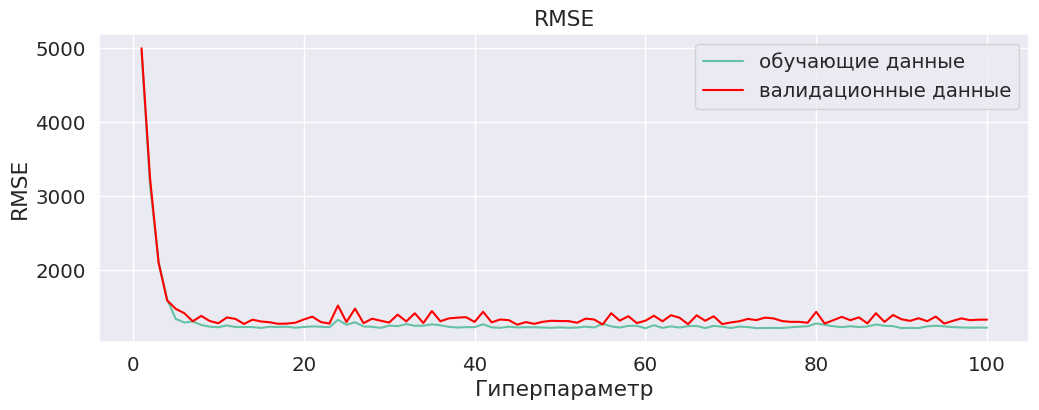

In [79]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12, 4))
    plt.plot(np.linspace(1, 100, 100), train_errors[0])
    plt.plot(np.linspace(1, 100, 100), valid_errors[0], color='r')
    plt.legend(['обучающие данные', 'валидационные данные'])
    plt.xlabel('Гиперпараметр')
    plt.title('RMSE')
    plt.ylabel('RMSE')
    plt.show()

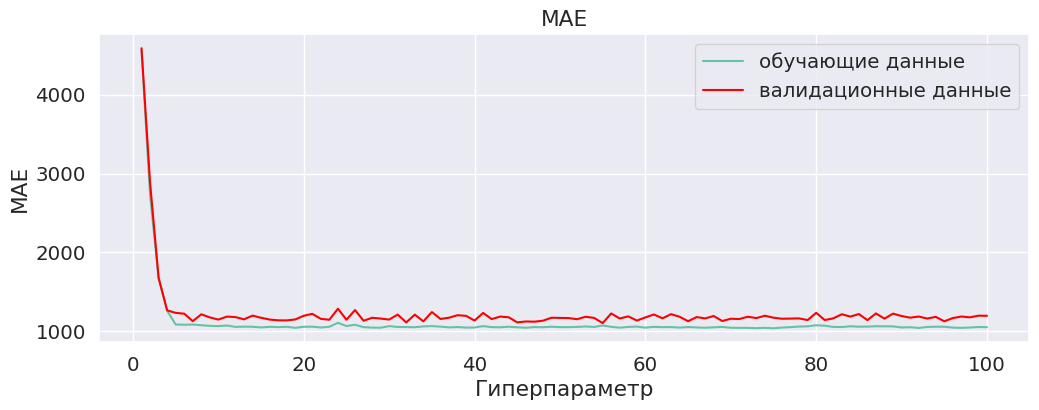

In [80]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12, 4))
    plt.plot(np.linspace(1, 100, 100), train_errors[1])
    plt.plot(np.linspace(1, 100, 100), valid_errors[1], color='r')
    plt.legend(['обучающие данные', 'валидационные данные'])
    plt.title('MAE')
    plt.xlabel('Гиперпараметр')
    plt.ylabel('MAE')
    plt.show()

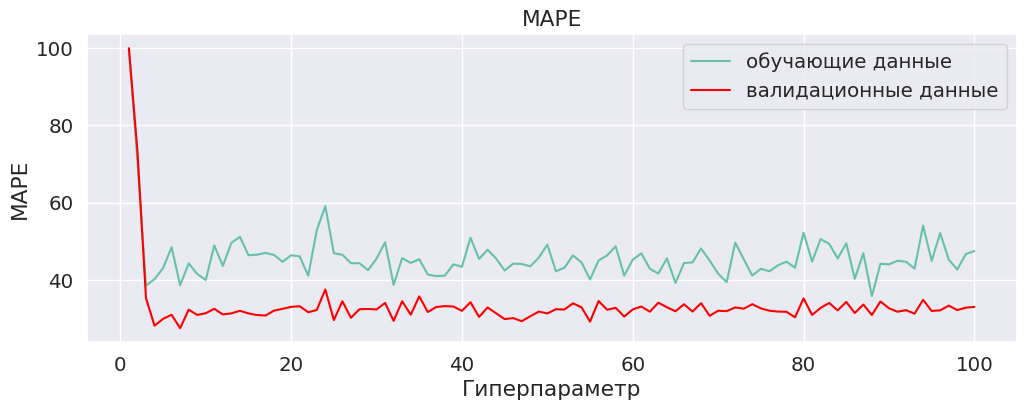

In [81]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12, 4))
    plt.plot(np.linspace(1, 100, 100), train_errors[2])
    plt.plot(np.linspace(1, 100, 100), valid_errors[2], color='r')
    plt.legend(['обучающие данные', 'валидационные данные'])
    plt.xlabel('Гиперпараметр')
    plt.title('MAPE')
    plt.ylabel('MAPE')
    plt.show()

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Видим что по всем метрикам число итераций не превысило 10-ти

Посчитайте ошибку на тестовой выборке.

In [82]:
test_pred = X_test @ theta

print(
    f'RMSE = {(metrics.mean_squared_error(test[target_feature], test_pred) ** 0.5):.2f}'
)
print(
    f'MAE = {(metrics.mean_absolute_error(test[target_feature], test_pred)):.2f}'
)
print(
    f'MAPE = {(mean_absolute_percentage_error(test[target_feature], test_pred)):.2f}%'
)

RMSE = 1369.26
MAE = 1162.59
MAPE = 38.43%


Сделайте выводы.

В данной работе мы изучили различные способы рассчёта таргет признака по другим признакам, решив задачу 4-мя различными способами мы не выявили явного фаворита. Можно сделать вывод, что не всегда есть единственное правильное решение задачи